In [1]:
import sqlite3

# Connect (this will create the database file if it doesn’t exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create table (drop if already exists for re-run)
cursor.execute("DROP TABLE IF EXISTS sales;")
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
);
""")

# Insert some dummy sales data
sales_data = [
    ("Laptop", 5, 70000),
    ("Laptop", 3, 75000),
    ("Mobile", 10, 20000),
    ("Mobile", 6, 22000),
    ("Tablet", 8, 15000),
    ("Tablet", 4, 16000),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?);", sales_data)
conn.commit()
conn.close()
print("Database and sample sales table created successfully ✅")

Database and sample sales table created successfully ✅


In [2]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect("sales_data.db")

# SQL query to get total quantity and revenue per product
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product;
"""

df = pd.read_sql_query(query, conn)
conn.close()

# Print summary
print("Basic Sales Summary:")
print(df)

Basic Sales Summary:
  product  total_qty   revenue
0  Laptop          8  575000.0
1  Mobile         16  332000.0
2  Tablet         12  184000.0


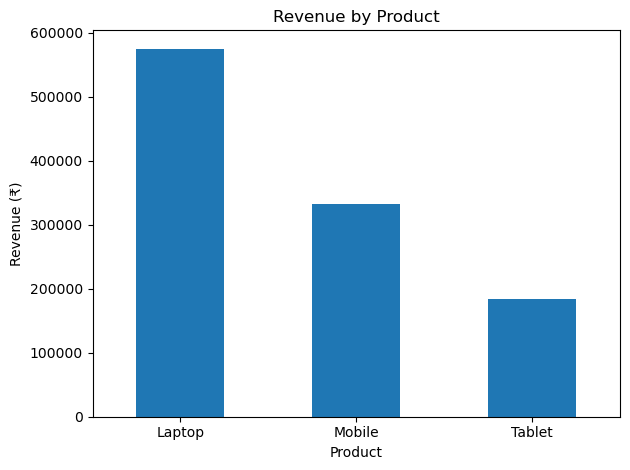

In [3]:
import matplotlib.pyplot as plt

# Bar chart of revenue per product
df.plot(kind="bar", x="product", y="revenue", legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue (₹)")
plt.xlabel("Product")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Save chart if needed
# plt.savefig("sales_chart.png")